In [1]:
# Let's start with some standard imports.

import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import pearsonr
import numpy as np
%matplotlib inline

In [4]:
# Load the data and take a look.

results = pd.read_csv('change_comparisons.tsv', sep = '\t')
results.head()

,testype,name1,name2,ceiling1,floor1,ceiling2,floor2,meandate1,meandate2,acc1,acc2,alienacc1,alienacc2,spearman,spear1on2,spear2on1,loss,loss1on2,loss2on1
0,self,rccsf1870_1899_0_1,rccsf1870_1899_0_2,1899,1870,1899,1870,1887.90,1885.25,0.78,0.80,0.72,0.80,1.305137,1.262228,1.348046,0.030,0.00,0.06
1,cross,rccsf1870_1899_0_1,rccsf1900_1929_0_1,1899,1870,1929,1900,1887.90,1912.23,0.78,0.88,0.75,0.87,1.244858,1.271877,1.217840,0.020,0.01,0.03
2,cross,rccsf1870_1899_0_1,rccsf1900_1929_1_1,1899,1870,1929,1900,1887.90,1912.80,0.78,0.90,0.78,0.79,1.129611,1.131644,1.127579,0.055,0.11,0.00
3,cross,rccsf1870_1899_0_2,rccsf1900_1929_2_2,1899,1870,1929,1900,1885.25,1912.69,0.80,0.92,0.82,0.76,1.434979,1.376460,1.493498,0.070,0.16,-0.02
4,cross,rccsf1870_1899_0_2,rccsf1900_1929_3_2,1899,1870,1929,1900,1885.25,1912.52,0.80,0.91,0.82,0.80,1.583865,1.539755,1.627974,0.045,0.11,-0.02


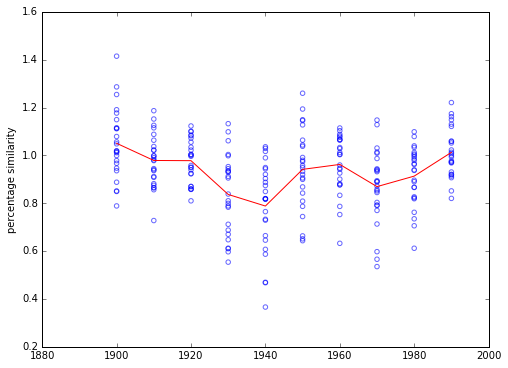

In [17]:
# Let's group self-comparisons by period
ceiling2meanself = dict()
selfcomp = results[results.testype == 'self']

grouped = selfcomp.groupby('ceiling1')
# for a self-comparison ceiling1 is the same as ceiling2

for ceil, df in grouped:
    ceiling2meanself[ceil] = np.mean(df.spearman)

changepace = []
meandates = []
losses = []
normless = []

for idx, row in results.iterrows():
    if row['testype'] == 'self':
        continue
    
    norm = (ceiling2meanself[row['ceiling1']] + ceiling2meanself[row['ceiling2']]) / 2
    # norm = max(ceiling2meanself[row['ceiling1']], ceiling2meanself[row['ceiling2']])
    meandates.append(row['floor2'])
    changepace.append(row['spearman'] / norm)
    losses.append(row['loss'])
    normless.append(row['spearman'])
    

newdf = pd.DataFrame()
fig, ax = plt.subplots(figsize = (8, 6))
plt.scatter(meandates, changepace, facecolors = 'none', edgecolors = 'b', alpha = 0.6)
summary = pd.DataFrame({'date' : meandates, 'pace' : changepace})
groups = summary.groupby('date')
meanpace = groups.aggregate(np.mean)
plt.plot(meanpace.index, meanpace.pace, color = 'r')
plt.ylabel('percentage similarity')
plt.show()

In [14]:
ceiling2meanself

{1899: 1.19667133221,
 1909: 1.1455291662040001,
 1919: 1.283371089074,
 1929: 1.462436685456,
 1939: 1.4488483101239999,
 1949: 1.486571806578,
 1959: 1.3638440798039997,
 1969: 1.3546753642280003,
 1979: 1.3908257371399997,
 1989: 1.4416781555280003,
 1999: 1.4444489394939999,
 2009: 1.381365090966,
 2010: 1.2139763545649997}

In [18]:
pearsonr(normless, losses)

(-0.66551567708906445, 2.3637240186484631e-33)

In [19]:
pearsonr(changepace, losses)

(-0.66559123867446846, 2.3111309854797484e-33)

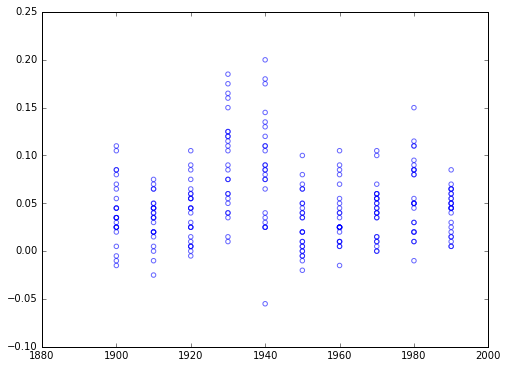

In [20]:
fig, ax = plt.subplots(figsize = (8, 6))
plt.scatter(meandates, losses, facecolors = 'none', edgecolors = 'b', alpha = 0.6)
plt.show()